In [1]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
os.chdir("D:\\USPA - Demand Planning v2\\Store v2\\2. Data\\Category class\\")

In [7]:
Data = pd.read_csv("USPA Store Data updated.csv")

In [8]:
#Find out if there are any nulls in the data
print(Data.isnull().sum(axis=0))

New Store code              0
SUBBRAND                    0
MATERIALTYPE                0
month                       0
sum_gsv                     0
Sum_netqty                  0
Return Perc GSV             0
Return Perc volume          0
Avg_Discount percentage     0
Discounted volume           0
eoss_flag                   0
eoss_days                   0
isfirstmonth                0
ltl_gsv                     0
LTL_netqty                  0
Ugadi_Fest                  0
Bihu_Fest                   0
Ramzan_Fest                 0
Ganesh_Chaturthi            0
Dusherra_Fest               0
Diwali_Fest                 0
Christmas_Fest              0
New_Year_Fest               0
Holi                        0
Labor_Day_Fest              0
Gandhi_Jayanthi_Day_Fest    0
Good_Friday_Fest            0
Raksha_Bandhan_Fest         0
Eid                         0
Prev Period Growth          0
                           ..
Discount_Lag6               0
Discount_Lag7               0
Discount_L

In [9]:
#Delete the rows with Null values
Data.dropna(how = 'any', axis = 0, inplace=True)
print(Data.isnull().sum(axis=0))

New Store code              0
SUBBRAND                    0
MATERIALTYPE                0
month                       0
sum_gsv                     0
Sum_netqty                  0
Return Perc GSV             0
Return Perc volume          0
Avg_Discount percentage     0
Discounted volume           0
eoss_flag                   0
eoss_days                   0
isfirstmonth                0
ltl_gsv                     0
LTL_netqty                  0
Ugadi_Fest                  0
Bihu_Fest                   0
Ramzan_Fest                 0
Ganesh_Chaturthi            0
Dusherra_Fest               0
Diwali_Fest                 0
Christmas_Fest              0
New_Year_Fest               0
Holi                        0
Labor_Day_Fest              0
Gandhi_Jayanthi_Day_Fest    0
Good_Friday_Fest            0
Raksha_Bandhan_Fest         0
Eid                         0
Prev Period Growth          0
                           ..
Discount_Lag6               0
Discount_Lag7               0
Discount_L

In [10]:
print(Data.columns)

Index(['New Store code', 'SUBBRAND', 'MATERIALTYPE', 'month', 'sum_gsv',
       'Sum_netqty', 'Return Perc GSV', 'Return Perc volume',
       'Avg_Discount percentage', 'Discounted volume',
       ...
       'Return_Lag4', 'Return_Lag5', 'Return_Lag6', 'Return_Lag7',
       'Return_Lag8', 'Return_Lag9', 'Return_Lag10', 'Return_Lag11', 'mon',
       'Year'],
      dtype='object', length=102)


In [12]:
Data = Data[['New Store code', 'SUBBRAND', 'MATERIALTYPE', 'month', 'Year',
       'mon','Sum_netqty', 'Return Perc GSV', 'Return Perc volume',
       'Avg_Discount percentage', 'Discounted volume', 'eoss_flag',
       'eoss_days', 'isfirstmonth', 'ltl_gsv', 'LTL_netqty', 'Ugadi_Fest',
       'Bihu_Fest', 'Ramzan_Fest', 'Ganesh_Chaturthi', 'Dusherra_Fest',
       'Diwali_Fest', 'Christmas_Fest', 'New_Year_Fest', 'Holi',
       'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest', 'Good_Friday_Fest',
       'Raksha_Bandhan_Fest', 'Eid',
       'Total_fest', 'core_stock', 'current_stock', 'old_stock',
       'core_stock_lm', 'current_stock_lm', 'old_stock_lm', 
        'AGE', 'TERRITORY', 'CARPET AREA', 'TIER',
       'Total Stock', 'NetQty_Lag1', 'NetQty_Lag2', 'NetQty_Lag3',
       'NetQty_Lag4', 'NetQty_Lag5', 'NetQty_Lag6', 'NetQty_Lag7',
       'NetQty_Lag8', 'NetQty_Lag9', 'NetQty_Lag10', 'NetQty_Lag11',
       'TotalStock_Lag1', 'TotalStock_Lag2', 'TotalStock_Lag3',
       'TotalStock_Lag4', 'TotalStock_Lag5', 'TotalStock_Lag6',
       'TotalStock_Lag7', 'TotalStock_Lag8', 'TotalStock_Lag9',
       'TotalStock_Lag10', 'TotalStock_Lag11', 'Discount_Lag1',
       'Discount_Lag2', 'Discount_Lag3', 'Discount_Lag4', 'Discount_Lag5',
       'Discount_Lag6', 'Discount_Lag7', 'Discount_Lag8', 'Discount_Lag9',
       'Discount_Lag10', 'Discount_Lag11', 'gsv_Lag1', 'gsv_Lag2', 'gsv_Lag3',
       'gsv_Lag4', 'gsv_Lag5', 'gsv_Lag6', 'gsv_Lag7', 'gsv_Lag8', 'gsv_Lag9',
       'gsv_Lag10', 'gsv_Lag11', 'Return_Lag1', 'Return_Lag2', 'Return_Lag3',
       'Return_Lag4', 'Return_Lag5', 'Return_Lag6', 'Return_Lag7',
       'Return_Lag8', 'Return_Lag9', 'Return_Lag10', 'Return_Lag11']]

In [13]:
#Filtering Data to exclude months having 0 sales
Data= Data[(Data['Sum_netqty'] > 0) & (Data['ltl_gsv'] > 0) & (Data['LTL_netqty'] > 0)]
print(Data.Sum_netqty.describe())
print(Data.shape)

count    62556.000000
mean        86.658562
std         92.719074
min          1.000000
25%         30.000000
50%         58.000000
75%        110.000000
max       1338.000000
Name: Sum_netqty, dtype: float64
(62556, 99)


In [10]:
Training = Data[(Data['month'] > 201612) & (Data['month'] < 201908)]
Test1 = Data[(Data['month'] > 201908) & (Data['month'] <= 201912) ]
Test = Test1
Test.drop(['New Store code','month'],axis=1)
print(Training.shape)
print(Test1.shape)

(46065, 101)
(4472, 101)


In [11]:
print(Test1.columns)
print(Test1.shape)
print(Training.columns)
print(Training.shape)

Index(['New Store code', 'SUBBRAND', 'MATERIALTYPE', 'month', 'Year',
       'Discount bucket', 'Discount volume bucket', 'Mon', 'Sum_netqty',
       'Return Perc GSV',
       ...
       'Return_Lag2', 'Return_Lag3', 'Return_Lag4', 'Return_Lag5',
       'Return_Lag6', 'Return_Lag7', 'Return_Lag8', 'Return_Lag9',
       'Return_Lag10', 'Return_Lag11'],
      dtype='object', length=101)
(4472, 101)
Index(['New Store code', 'SUBBRAND', 'MATERIALTYPE', 'month', 'Year',
       'Discount bucket', 'Discount volume bucket', 'Mon', 'Sum_netqty',
       'Return Perc GSV',
       ...
       'Return_Lag2', 'Return_Lag3', 'Return_Lag4', 'Return_Lag5',
       'Return_Lag6', 'Return_Lag7', 'Return_Lag8', 'Return_Lag9',
       'Return_Lag10', 'Return_Lag11'],
      dtype='object', length=101)
(46065, 101)


In [12]:
Data2 = Training
print(Data.shape)
print(Data2.shape)

(62556, 101)
(46065, 101)


In [13]:
#applying log transformation
Data2['Sum_netqty'] = np.log(Data2['Sum_netqty'])
Data2['ltl_gsv'] = np.log(Data2['ltl_gsv'])
Data2['LTL_netqty'] = np.log(Data2['LTL_netqty'])

In [14]:
Data3 = Data2[(Data2['ltl_gsv'] > 7)]
Data3 = Data3[(Data3['LTL_netqty'] > 0.5)]

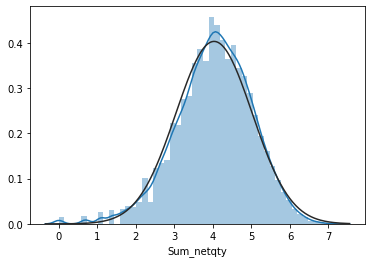

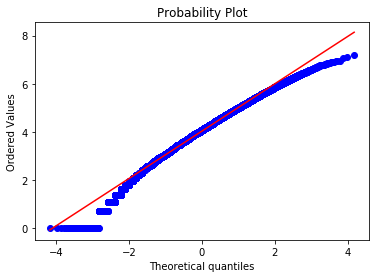

In [80]:
#histogram and normal probability plot
sns.distplot(Data2['Sum_netqty'], fit=norm);
fig = plt.figure()
res = stats.probplot(Data2['Sum_netqty'], plot=plt)

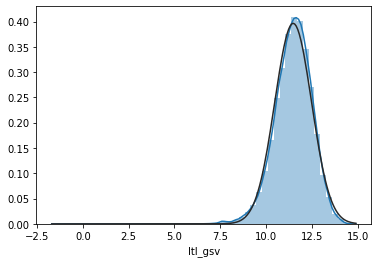

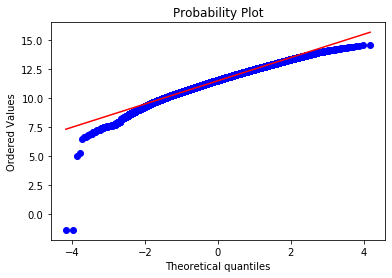

In [81]:
#histogram and normal probability plot
sns.distplot(Data2['ltl_gsv'], fit=norm);
fig = plt.figure()
res = stats.probplot(Data2['ltl_gsv'], plot=plt)

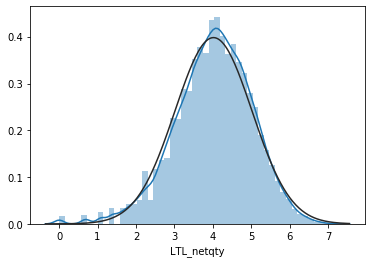

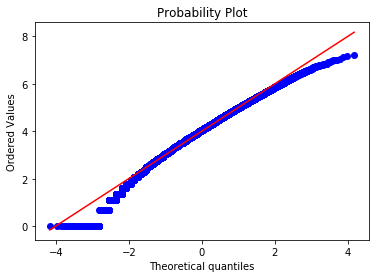

In [83]:
#histogram and normal probability plot
sns.distplot(Data2['LTL_netqty'], fit=norm);
fig = plt.figure()
res = stats.probplot(Data2['LTL_netqty'], plot=plt)

In [15]:
ModelingData = Data3.drop(['New Store code','month'],axis=1)
print(Data3.shape)
print(ModelingData.shape)

(45949, 101)
(45949, 99)


In [16]:
ModelingData.columns

Index(['SUBBRAND', 'MATERIALTYPE', 'Year', 'Discount bucket',
       'Discount volume bucket', 'Mon', 'Sum_netqty', 'Return Perc GSV',
       'Return Perc volume', 'Avg_Discount percentage', 'Discounted volume',
       'eoss_flag', 'eoss_days', 'isfirstmonth', 'ltl_gsv', 'LTL_netqty',
       'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest', 'Ganesh_Chaturthi',
       'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest', 'New_Year_Fest',
       'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Prev Period Growth',
       'Prev Yr Growth', 'Total_fest', 'core_stock', 'current_stock',
       'old_stock', 'core_stock_lm', 'current_stock_lm', 'old_stock_lm', 'AGE',
       'TERRITORY', 'CARPET AREA', 'TIER', 'Total Stock', 'NetQty_Lag1',
       'NetQty_Lag2', 'NetQty_Lag3', 'NetQty_Lag4', 'NetQty_Lag5',
       'NetQty_Lag6', 'NetQty_Lag7', 'NetQty_Lag8', 'NetQty_Lag9',
       'NetQty_Lag10', 'NetQty_Lag11', 'TotalStock_Lag1', 'TotalStock_Lag2

In [17]:
Training = ModelingData

In [18]:
Test.drop(['New Store code','month'],axis=1,inplace=True)

In [19]:
Test.columns

Index(['SUBBRAND', 'MATERIALTYPE', 'Year', 'Discount bucket',
       'Discount volume bucket', 'Mon', 'Sum_netqty', 'Return Perc GSV',
       'Return Perc volume', 'Avg_Discount percentage', 'Discounted volume',
       'eoss_flag', 'eoss_days', 'isfirstmonth', 'ltl_gsv', 'LTL_netqty',
       'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest', 'Ganesh_Chaturthi',
       'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest', 'New_Year_Fest',
       'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Prev Period Growth',
       'Prev Yr Growth', 'Total_fest', 'core_stock', 'current_stock',
       'old_stock', 'core_stock_lm', 'current_stock_lm', 'old_stock_lm', 'AGE',
       'TERRITORY', 'CARPET AREA', 'TIER', 'Total Stock', 'NetQty_Lag1',
       'NetQty_Lag2', 'NetQty_Lag3', 'NetQty_Lag4', 'NetQty_Lag5',
       'NetQty_Lag6', 'NetQty_Lag7', 'NetQty_Lag8', 'NetQty_Lag9',
       'NetQty_Lag10', 'NetQty_Lag11', 'TotalStock_Lag1', 'TotalStock_Lag2

In [20]:
Training_dummy = pd.get_dummies(Training)
Test_dummy = pd.get_dummies(Test)
print(Training_dummy.shape)
print(Test_dummy.shape)

(45949, 127)
(4472, 126)


In [21]:
Training_dummy.columns

Index(['Year', 'Discount bucket', 'Discount volume bucket', 'Mon',
       'Sum_netqty', 'Return Perc GSV', 'Return Perc volume',
       'Avg_Discount percentage', 'Discounted volume', 'eoss_flag',
       ...
       'TERRITORY_RAJASTHAN', 'TERRITORY_ROAT', 'TERRITORY_ROM',
       'TERRITORY_TN', 'TERRITORY_WB', 'TERRITORY_WUP+UKH', 'TIER_M',
       'TIER_T1', 'TIER_T2', 'TIER_T3'],
      dtype='object', length=127)

In [22]:
# Get missing columns in the training test
missing_cols = set( Training_dummy.columns ) - set( Test_dummy.columns )
print(missing_cols)

{'TERRITORY_HARYANA'}


In [23]:
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    Test_dummy[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
Test_dummy = Test_dummy[Training_dummy.columns]

In [24]:
Train_X = Training_dummy.drop(['Sum_netqty'],axis=1)
Train_Y = Training_dummy['Sum_netqty']
Test_X = Test_dummy.drop(['Sum_netqty'],axis=1)
Test_Y = Test_dummy['Sum_netqty']
Test_X['ltl_gsv'] = np.log(Test_X['ltl_gsv'])
Test_X['LTL_netqty'] = np.log(Test_X['LTL_netqty'])
Train_X.to_csv("D:\\USPA - Demand Planning v2\\Store v2\\1. Codes\\Workflow\\Category class\\Feature_trainig_Data.csv")

#print(Test_X.isnull().sum(axis=0))

In [26]:
Train_X.drop(['TotalStock_Lag1', 'TotalStock_Lag2',
       'TotalStock_Lag3', 'TotalStock_Lag4', 'TotalStock_Lag5',
       'TotalStock_Lag6', 'TotalStock_Lag7', 'TotalStock_Lag8',
       'TotalStock_Lag9', 'TotalStock_Lag10', 'TotalStock_Lag11',
       'Discount_Lag1', 'Discount_Lag2', 'Discount_Lag3', 'Discount_Lag4',
       'Discount_Lag5', 'Discount_Lag6', 'Discount_Lag7', 'Discount_Lag8',
       'Discount_Lag9', 'Discount_Lag10', 'Discount_Lag11', 'gsv_Lag1',
       'gsv_Lag2', 'gsv_Lag3', 'gsv_Lag4', 'gsv_Lag5', 'gsv_Lag6', 'gsv_Lag7',
       'gsv_Lag8', 'gsv_Lag9', 'gsv_Lag10', 'gsv_Lag11', 'Return_Lag1',
       'Return_Lag2', 'Return_Lag3', 'Return_Lag4', 'Return_Lag5',
       'Return_Lag6', 'Return_Lag7', 'Return_Lag8', 'Return_Lag9',
       'Return_Lag10', 'Return_Lag11'],axis=1,inplace=True)
Test_X.drop(['TotalStock_Lag1', 'TotalStock_Lag2',
       'TotalStock_Lag3', 'TotalStock_Lag4', 'TotalStock_Lag5',
       'TotalStock_Lag6', 'TotalStock_Lag7', 'TotalStock_Lag8',
       'TotalStock_Lag9', 'TotalStock_Lag10', 'TotalStock_Lag11',
       'Discount_Lag1', 'Discount_Lag2', 'Discount_Lag3', 'Discount_Lag4',
       'Discount_Lag5', 'Discount_Lag6', 'Discount_Lag7', 'Discount_Lag8',
       'Discount_Lag9', 'Discount_Lag10', 'Discount_Lag11', 'gsv_Lag1',
       'gsv_Lag2', 'gsv_Lag3', 'gsv_Lag4', 'gsv_Lag5', 'gsv_Lag6', 'gsv_Lag7',
       'gsv_Lag8', 'gsv_Lag9', 'gsv_Lag10', 'gsv_Lag11', 'Return_Lag1',
       'Return_Lag2', 'Return_Lag3', 'Return_Lag4', 'Return_Lag5',
       'Return_Lag6', 'Return_Lag7', 'Return_Lag8', 'Return_Lag9',
       'Return_Lag10', 'Return_Lag11'],axis=1,inplace=True)

In [194]:
XGBGrid = {  "learning_rate"    : [0.05, 0.10, 0.15, 0.25, 0.30 ] ,
             "max_depth"        : [ 3,4, 5,8],
             "min_child_weight" : [ 1, 3, 5 ],
             "gamma"            : [ 0.0, 0.1, 0.2],
             "colsample_bytree" : [0.7,1 ] }

In [196]:
# Import the model we are using
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
# Instantiate model with 1000 decision trees
best_xgb_model = XGBRegressor(n_estimators=10000)
XGB_random = RandomizedSearchCV(estimator = best_xgb_model, param_distributions = XGBGrid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42)
# Train the model on training data
XGB_random.fit(Train_X, Train_Y);

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] min_child_weight=5, max_depth=5, learning_rate=0.25, gamma=0.0, colsample_bytree=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[10:07:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

In [178]:
from xgboost import XGBRegressor
best_xgb_model = XGBRegressor(booster='gbtree',n_estimators=10000,objective='reg:squarederror',
             random_state=0,seed=42, silent=None,verbosity=1)
best_xgb_model.fit(Train_X,Train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, silent=None, subsample=1, verbosity=1)

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])
Train_rescaled = scaler.fit_transform(Train_X.values)
Test_rescaled = scaler.fit_transform(Test_X.values)

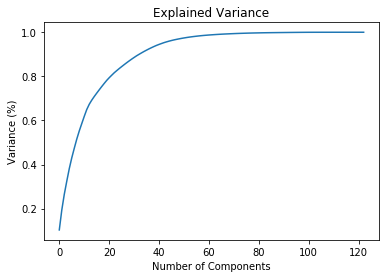

In [28]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(Train_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [29]:
pca = PCA(n_components=40)
Train_datapca = pca.fit_transform(Train_rescaled)
Test_datapcs = pca.fit_transform(Test_rescaled)

In [620]:
#Ensemble model stacking
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
models = [
    RandomForestRegressor(n_estimators = 500, random_state = 42),
    GradientBoostingRegressor(n_estimators  = 500)    
]

In [626]:
from sklearn import metrics
def RMSLE(y, pred):
    return metrics.mean_squared_error(y, pred) ** 0.5

In [629]:
from vecstack import stacking
from xgboost import XGBRegressor
S_train, S_test = stacking(models, Train_X, Train_Y, Test_X,
    regression = True, n_folds = 4,
    shuffle = True, random_state = 1914, verbose = 2)

best_xgb_model = XGBRegressor(      
                base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             seed=42, silent=None, subsample=1, verbosity=1)
best_xgb_model.fit(S_train,Train_Y)

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [RandomForestRegressor]
    fold  0:  [0.30987320]
    fold  1:  [0.30780599]
    fold  2:  [0.31466362]
    fold  3:  [0.32148945]
    ----
    MEAN:     [0.31345806] + [0.00526198]
    FULL:     [0.31345788]

model  1:     [GradientBoostingRegressor]
    fold  0:  [0.29378114]
    fold  1:  [0.28947133]
    fold  2:  [0.29679506]
    fold  3:  [0.29922218]
    ----
    MEAN:     [0.29481743] + [0.00363894]
    FULL:     [0.29481732]



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             seed=42, silent=None, subsample=1, verbosity=1)

In [27]:
from xgboost import XGBRegressor
best_xgb_model = XGBRegressor(      
                base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             seed=42, silent=None, subsample=1, verbosity=1)
best_xgb_model.fit(Train_X,Train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             seed=42, silent=None, subsample=1, verbosity=1)

In [428]:
random_grid = {'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 30, 50, 70,100],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [2, 5, 10],
               'n_estimators' : [500,1000]
               }
print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50, 70, 100], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [2, 5, 10], 'n_estimators': [500, 1000]}


In [429]:
#import pickle
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42)
# Train the model on training data
rf_random.fit(Train_X, Train_Y);
# save the model to disk
#filename = 'StoreModelUSPA_iter1.sav'
#pickle.dump(rf, open(filename, 'wb'))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  49.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.9s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  47.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  49.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30, total= 3.6min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30, total= 3.6min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=30, total= 3.5min
[CV] n_estimators=1000, min_samples_split=3, min_

[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=10, max_features=sqrt, max_depth=70, total=  27.8s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=10, max_features=sqrt, max_depth=70 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=10, max_features=sqrt, max_depth=70, total=  28.1s
[CV] n_estimators=1000, min_samples_split=3, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=3, min_samples_leaf=5, max_features=auto, max_depth=30, total= 6.9min
[CV] n_estimators=1000, min_samples_split=3, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=3, min_samples_leaf=5, max_features=auto, max_depth=30, total= 6.9min
[CV] n_estimators=1000, min_samples_split=3, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=3, min_samples_leaf=5, max_features=auto, max_depth=30, total= 6.8min
[CV] n_estimators=500, min_samples_split=4,

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  32.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  31.9s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  23.3s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  23.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  22.8s
[CV] n_estimators=500, min_samples_split=4, min_samp

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=  44.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=  44.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, total= 2.4min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, total= 2.5min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=10, total= 2.4min
[CV] n_estimators=1000, min_samples_spli

[CV]  n_estimators=500, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=10, total= 2.5min
[CV] n_estimators=500, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=3, min_samples_leaf=2, max_features=auto, max_depth=10, total= 2.5min
[CV] n_estimators=500, min_samples_split=3, min_samples_leaf=10, max_features=sqrt, max_depth=100 
[CV]  n_estimators=500, min_samples_split=3, min_samples_leaf=10, max_features=sqrt, max_depth=100, total=  27.7s
[CV] n_estimators=500, min_samples_split=3, min_samples_leaf=10, max_features=sqrt, max_depth=100 
[CV]  n_estimators=500, min_samples_split=3, min_samples_leaf=10, max_features=sqrt, max_depth=100, total=  27.8s
[CV] n_estimators=500, min_samples_split=3, min_samples_leaf=10, max_features=sqrt, max_depth=100 
[CV]  n_estimators=500, min_samples_split=3, min_samples_leaf=10, max_features=sqrt, max_depth=100, total=  27.9s
[CV] n_estimators=500, min_samples_split

[CV]  n_estimators=500, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=100, total=  39.2s
[CV] n_estimators=500, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=100 
[CV]  n_estimators=500, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=100, total=  39.9s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  22.8s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  22.7s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  22.4s
[CV] n_estimators=500, min_samples_split=3, min_s

[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=50, total= 1.3min
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=50, total= 1.3min
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=10, total= 2.5min
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=10, total= 2.5min
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=5, max_features=auto, max_depth=10, total= 2.5min
[CV] n_estimators=500, min_samples_split=2, min_s

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=70, total=  55.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  44.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  45.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  45.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=  45.7s
[CV] n_estimators=1000, min_samples_split=

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 881.7min finished


In [36]:
Test_X.to_csv("D:\\USPA - Demand Planning v2\\Store v2\\TestData.csv")

In [48]:
TestX = pd.read_csv("D:\\USPA - Demand Planning v2\\Store v2\\TestData_updated.csv")

In [53]:
columns= Train_X.columns.tolist()
print(columns)

['Year', 'Mon', 'Return Perc GSV', 'Return Perc volume', 'Avg_Discount percentage', 'Discounted volume', 'eoss_flag', 'eoss_days', 'isfirstmonth', 'ltl_gsv', 'LTL_netqty', 'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest', 'Ganesh_Chaturthi', 'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest', 'New_Year_Fest', 'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest', 'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Prev Period Growth', 'Prev Yr Growth', 'Total_fest', 'core_stock', 'current_stock', 'old_stock', 'core_stock_lm', 'current_stock_lm', 'old_stock_lm', 'AGE', 'CARPET AREA', 'Total Stock', 'NetQty_Lag1', 'NetQty_Lag2', 'NetQty_Lag3', 'NetQty_Lag4', 'NetQty_Lag5', 'NetQty_Lag6', 'NetQty_Lag7', 'NetQty_Lag8', 'NetQty_Lag9', 'NetQty_Lag10', 'NetQty_Lag11', 'TotalStock_Lag1', 'TotalStock_Lag2', 'TotalStock_Lag3', 'TotalStock_Lag4', 'TotalStock_Lag5', 'TotalStock_Lag6', 'TotalStock_Lag7', 'TotalStock_Lag8', 'TotalStock_Lag9', 'TotalStock_Lag10', 'TotalStock_Lag11', 'Discount_Lag1', 'Discount_La

In [54]:
TestX2 = TestX[columns]

In [25]:
predictions = best_xgb_model.predict(Test_X)

In [236]:
pred= np.exp(predictions)
np.savetxt("D:\\USPA - Demand Planning v2\\Store\\Regression\\Results\\Predictions_11.csv",pred)

In [2]:
import pandas as pd
feature_importances = pd.DataFrame(best_xgb_model.feature_importances_,
                                   index = Train_X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)
feature_importances.to_csv("feature_importances.csv")

NameError: name 'best_xgb_model' is not defined

In [26]:
Predction = pd.DataFrame(predictions, columns = ['Prediction'])

In [27]:
print(Test_X.shape)
print(Predction.shape)

(4472, 126)
(4472, 1)


In [30]:
Training = Data[(Data['month'] > 201612) & (Data['month'] < 201908)]
Test1 = Data[(Data['month'] > 201908) & (Data['month'] <= 201912) ]
Test = Test1
Test.drop(['New Store code','month'],axis=1)
print(Training.shape)
print(Test1.shape)

(46065, 101)
(4472, 101)


In [31]:
print(Test1.shape)
print(Predction.shape)

(4472, 101)
(4472, 1)


In [34]:
#Test['sum_gsv'] = np.log(Test1['sum_gsv'])
Final = pd.concat([Test1.reset_index(drop=True), Predction], axis=1)

In [35]:
Test1.columns

Index(['New Store code', 'SUBBRAND', 'MATERIALTYPE', 'month', 'Year',
       'Discount bucket', 'Discount volume bucket', 'Mon', 'Sum_netqty',
       'Return Perc GSV',
       ...
       'Return_Lag2', 'Return_Lag3', 'Return_Lag4', 'Return_Lag5',
       'Return_Lag6', 'Return_Lag7', 'Return_Lag8', 'Return_Lag9',
       'Return_Lag10', 'Return_Lag11'],
      dtype='object', length=101)

In [204]:
#Test['sum_gsv'] = np.log(Test['sum_gsv'])

In [36]:
Final.columns

Index(['New Store code', 'SUBBRAND', 'MATERIALTYPE', 'month', 'Year',
       'Discount bucket', 'Discount volume bucket', 'Mon', 'Sum_netqty',
       'Return Perc GSV',
       ...
       'Return_Lag3', 'Return_Lag4', 'Return_Lag5', 'Return_Lag6',
       'Return_Lag7', 'Return_Lag8', 'Return_Lag9', 'Return_Lag10',
       'Return_Lag11', 'Prediction'],
      dtype='object', length=102)

In [37]:
#Final['Actuals'] = np.exp(Final['sum_gsv'])
Final['Predicted'] = np.exp(Final['Prediction'])

In [39]:
Final.to_csv("D:\\USPA - Demand Planning v2\\Store v2\\3. Results\\Cat class\\XGB_12_23_It1.csv")